<a href="https://colab.research.google.com/github/benard3360-star/new/blob/master/Copy_of_Food_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pointers
* Price prediction: linear regression, SVR(Support Vector regression), RF
* Time series as part of price prediction for dependencies. Feature engineering will help the team to check lagged prices, moving averages and external data such as inflation(Economic indicator)
* Market segmentation based on price patterns or other chars (Map or visualization for top Commodity prices based on frequencies)

##Feature Engineering
Variables:
* lagged variables (days, weeks, moths, years prices)
* Calculated moving avgs
* technical indicators (RSI, MACD)
* Analyze trading volumes for potential insights

##Model Selection, Validation and Testing
* LSTM and Regression Models {check on economic indicators(such as inflation) and incorporating them into our dataset}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials


#### Load the Dataset then see the first few Rows

In [ ]:
file_path = "/content/Kenya_Food_Prices.csv"

# Convert the sheet data to a Pandas DataFrame
df = pd.read_csv(file_path)


In [ ]:
print(df.head(3).to_string())

        date admin1   admin2   market  latitude  longitude            category      commodity   unit priceflag  pricetype  currency (USD)    price
0  1/15/2006  Coast  Mombasa  Mombasa     -4.05  39.666667  cereals and tubers          Maize     KG    actual  Wholesale         69.9878    16.13
1  1/15/2006  Coast  Mombasa  Mombasa     -4.05  39.666667  cereals and tubers  Maize (white)  90 KG    actual  Wholesale         69.9878  1480.00
2  1/15/2006  Coast  Mombasa  Mombasa     -4.05  39.666667     pulses and nuts    Beans (dry)  90 KG    actual  Wholesale         69.9878  3246.00


#### Check for the Data types

In [ ]:
df.dtypes

,0
date,object
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


### Drop Unnecessary Columns

In [ ]:
# Drop the row at index 0 in place
df.drop(0, inplace=True)

# Print the modified DataFrame
print(df.head(3).to_string())

        date   admin1   admin2   market  latitude  longitude            category         commodity   unit priceflag  pricetype  currency (USD)    price
1  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)  90 KG    actual  Wholesale         69.9878  1480.00
2  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)  90 KG    actual  Wholesale         69.9878  3246.00
3  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)  50 KG    actual  Wholesale         69.9878  1249.99


### Check for Null Values

In [ ]:
df.isnull().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


#### Standardize the data types to make them appropriate

In [ ]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['price'] = df['price'].astype(float)

In [ ]:
df.dtypes

,0
date,object
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12867 entries, 1 to 12867
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            12867 non-null  object 
 1   admin1          12867 non-null  object 
 2   admin2          12867 non-null  object 
 3   market          12867 non-null  object 
 4   latitude        12867 non-null  float64
 5   longitude       12867 non-null  float64
 6   category        12867 non-null  object 
 7   commodity       12867 non-null  object 
 8   unit            12867 non-null  object 
 9   priceflag       12867 non-null  object 
 10  pricetype       12867 non-null  object 
 11  currency (USD)  12867 non-null  float64
 12  price           12867 non-null  float64
dtypes: float64(4), object(9)
memory usage: 1.3+ MB


#### Check for the composition of Features in columns by count

In [ ]:
df["admin2"].value_counts()

,count
admin2,
Nairobi,2685
Turkana,2425
Garissa,1193
Uasin Gishu,1056
Mombasa,965
Kisumu,910
Nakuru,765
Kitui,517
Baringo,384


In [ ]:
df["admin1"].value_counts()

,count
admin1,
Rift Valley,5142
Nairobi,2685
North Eastern,1520
Eastern,1310
Coast,1088
Nyanza,910
Central,212


In [ ]:
df["market"].value_counts()

,count
market,
Nairobi,1285
Eldoret town (Uasin Gishu),1056
Kisumu,720
Kitui,460
Nakuru,415
...,...
Wote town (Makueni),28
Makueni,25
Garissa,24


In [ ]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency (USD)', 'price'],
      dtype='object')

#### Rename the Columns for Easy use

In [ ]:
df.rename(columns={
    'date': 'Date',
    'admin1': 'Region',
    'admin2': 'County',
    'market': 'Market',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'commodity': 'Commodity',
    'category': 'Commodity Category',
    'unit': 'Item Unit',
    'priceflag': 'Priceflag',
    'pricetype': 'Pricetype',
    'currency (USD)': 'Currency(USD)',
    'price': 'Price (Ksh)'
}, inplace=True)


In [ ]:
print(df.head(4).to_string())

        Date   Region   County   Market  Latitude  Longitude  Commodity Category         Commodity Item Unit Priceflag  Pricetype  Currency(USD)  Price (Ksh)
1  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)     90 KG    actual  Wholesale        69.9878      1480.00
2  1/15/2006    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)     90 KG    actual  Wholesale        69.9878      3246.00
3  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)     50 KG    actual  Wholesale        69.9878      1249.99
4  1/15/2006  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers           Sorghum     90 KG    actual  Wholesale        69.9878      1800.00


#### Change Date to datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Region,object
County,object
Market,object
Latitude,float64
Longitude,float64
Commodity Category,object
Commodity,object
Item Unit,object
Priceflag,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12867 entries, 1 to 12867
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                12867 non-null  datetime64[ns]
 1   Region              12867 non-null  object        
 2   County              12867 non-null  object        
 3   Market              12867 non-null  object        
 4   Latitude            12867 non-null  float64       
 5   Longitude           12867 non-null  float64       
 6   Commodity Category  12867 non-null  object        
 7   Commodity           12867 non-null  object        
 8   Item Unit           12867 non-null  object        
 9   Priceflag           12867 non-null  object        
 10  Pricetype           12867 non-null  object        
 11  Currency(USD)       12867 non-null  float64       
 12  Price (Ksh)         12867 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
me

In [ ]:
df.columns

Index(['Date', 'Region', 'County', 'Market', 'Latitude', 'Longitude',
       'Commodity Category', 'Commodity', 'Item Unit', 'Priceflag',
       'Pricetype', 'Currency(USD)', 'Price (Ksh)'],
      dtype='object')

In [ ]:
# Remove bracketed values from the "Market" column
df['Market'] = df['Market'].str.replace(r"\(.*?\)", "", regex=True).str.strip()

### Feature Engineering

In [ ]:
# Extract numerical and unit parts
df["Unit_Numerical"] = df["Item Unit"].str.extract(r'(\d+)').fillna(1).astype(int)
df["Unit_Values"] = df["Item Unit"].str.extract(r'([A-Za-z]+)').fillna("")
#Given the date column we can obtain several features such as year and months
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day Name']=df['Date'].dt.day_name()
df['Day_Classification']=np.where(df['Day Name'].str.lower().isin(['saturday', 'sunday']), 'weekend', 'weekday')
# Display the updated DataFrame
print(df.head().to_string())

        Date   Region   County   Market  Latitude  Longitude  Commodity Category         Commodity Item Unit Priceflag  Pricetype  Currency(USD)  Price (Ksh)  Unit_Numerical Unit_Values  Year  Month Day Name Day_Classification
1 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667  cereals and tubers     Maize (white)     90 KG    actual  Wholesale        69.9878      1480.00              90          KG  2006      1   Sunday            weekend
2 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667     pulses and nuts       Beans (dry)     90 KG    actual  Wholesale        69.9878      3246.00              90          KG  2006      1   Sunday            weekend
3 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers  Potatoes (Irish)     50 KG    actual  Wholesale        69.9878      1249.99              50          KG  2006      1   Sunday            weekend
4 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667  cereals and tubers           S

In [ ]:
df1 = df.copy()

### Exploratory Data Analysis

In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,12867,2019-04-05 05:57:47.381673984,2006-01-15 00:00:00,2016-10-15 00:00:00,2021-05-15 00:00:00,2022-04-15 00:00:00,2024-09-15 00:00:00,NaN
Latitude,12867.0,0.132451,-4.65973,-1.283333,-0.1,1.253093,3.936804,2.209402
Longitude,12867.0,36.821003,34.727999,35.076653,36.78333,37.983333,41.858383,1.889164
Currency(USD),12867.0,108.221977,40.3771,101.2167,109.2559,115.4382,160.2384,19.395775
Price (Ksh),12867.0,2100.726875,5.0,63.0,223.33,3150.0,19800.0,3186.798797
Unit_Numerical,12867.0,61.93153,1.0,1.0,13.0,90.0,500.0,106.374524
Year,12867.0,2018.794979,2006.0,2016.0,2021.0,2022.0,2024.0,4.908578
Month,12867.0,6.115101,1.0,3.0,6.0,9.0,12.0,3.389303


In [ ]:
df1.describe(include="object")


,Region,County,Market,Commodity Category,Commodity,Item Unit,Priceflag,Pricetype,Unit_Values,Day Name,Day_Classification
count,12867,12867,12867,12867,12867,12867,12867,12867,12867,12867,12867
unique,7,22,59,8,47,14,2,2,7,7,2
top,Rift Valley,Nairobi,Nairobi,cereals and tubers,Beans (dry),KG,actual,Wholesale,KG,Monday,weekday
freq,5142,2685,1285,5857,1120,5390,8165,6774,10946,2386,9586


### The distribution of Prices

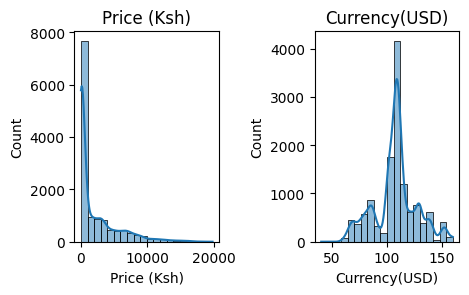

In [ ]:
# Distribution of Numerical Features
numerical_features = ["Price (Ksh)", "Currency(USD)"]

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['Date', 'Region', 'County', 'Market', 'Latitude', 'Longitude',
       'Commodity Category', 'Commodity', 'Item Unit', 'Priceflag',
       'Pricetype', 'Currency(USD)', 'Price (Ksh)', 'Unit_Numerical',
       'Unit_Values', 'Year', 'Month', 'Day Name', 'Day_Classification'],
      dtype='object')

#### Plots for the different Categorical Columns

Categorical Columns:
Region
County
Market
Commodity Category
Commodity
Item Unit
Priceflag
Pricetype


<ipython-input-28-c93e75527b27>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=sampled_data, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-28-c93e75527b27>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=sampled_data, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-28-c93e75527b27>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=sampled_data, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-28-c93e75527b27>:42: UserWarning: set_ticklabels() s

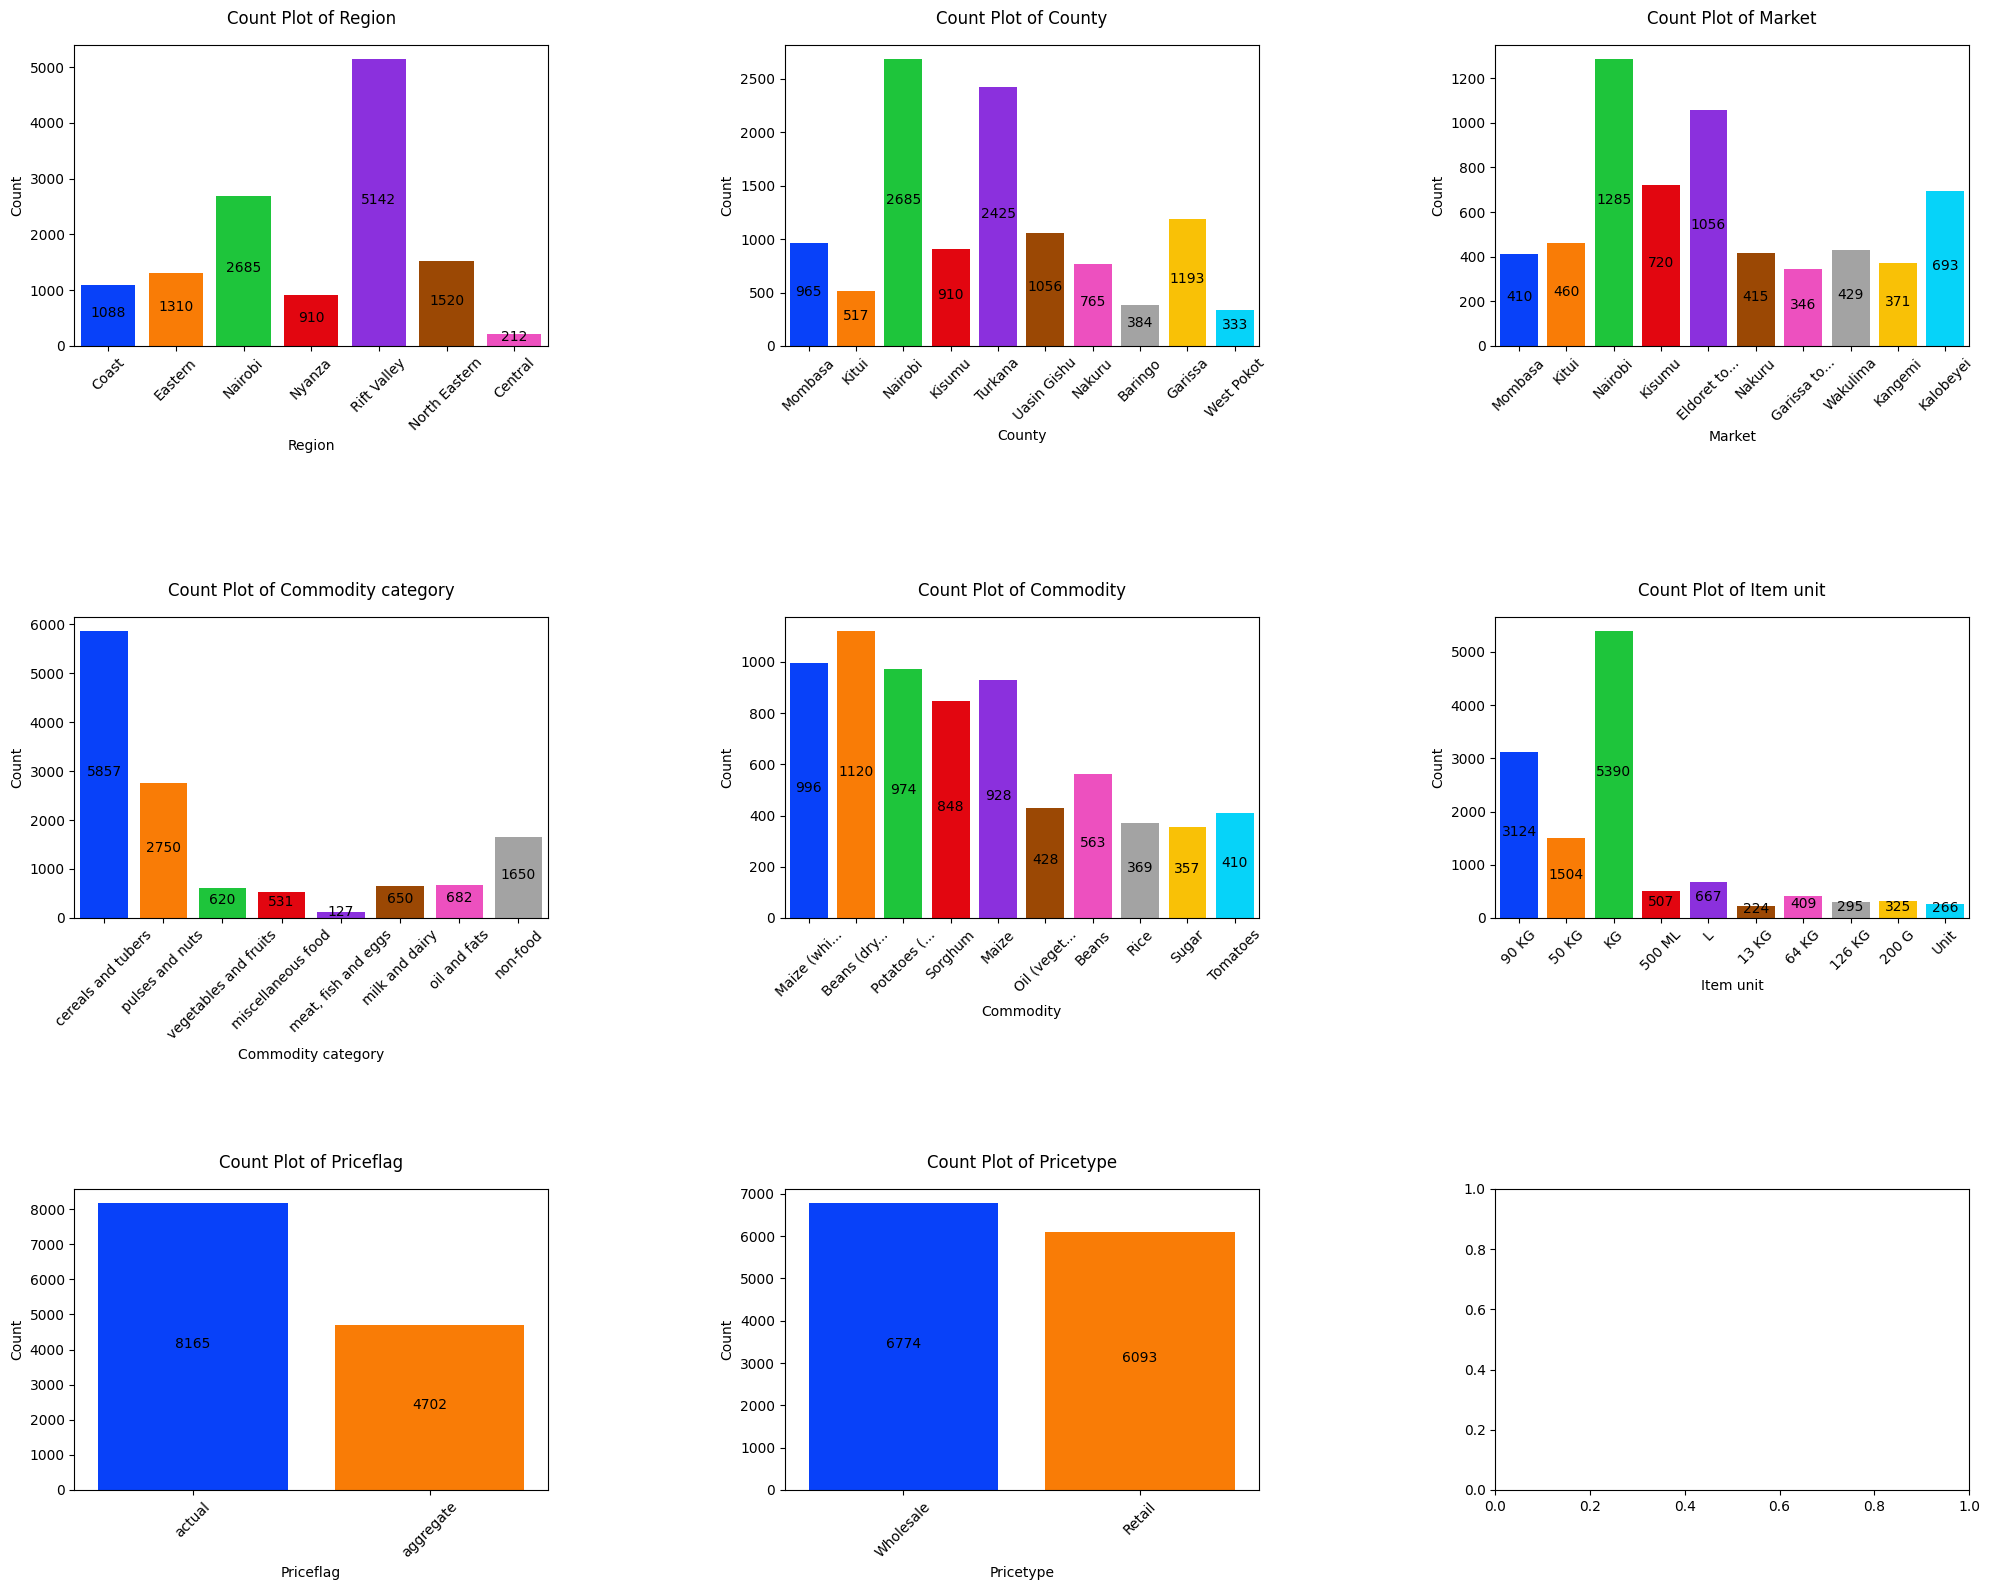

In [ ]:
# Define the list of categorical columns to analyze
categorical_columns = ['Region', 'County', 'Market',
                       'Commodity Category', 'Commodity', 'Item Unit', 'Priceflag',
                       'Pricetype']

# Print only the categorical columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)

# Calculate the number of rows and columns based on the number of categorical columns
num_columns = 3  # Adjust as needed
num_rows = (len(categorical_columns) // num_columns) + (len(categorical_columns) % num_columns > 0)

# Create subplots with an increased figure size for better readability
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 16))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Sample a subset of the column's values to avoid too many categories
    top_categories = df[column].value_counts().head(10).index  # Get the top 10 most frequent categories
    sampled_data = df[df[column].isin(top_categories)]  # Filter data to only include the top categories

    # Plot the countplot for the sampled data
    sns.countplot(x=column, data=sampled_data, palette='bright', ax=axes[i], saturation=0.95)

    # Add labels to the bars and position them below each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10, label_type='center', padding=2)

    # Set title and labels with capitalized column names
    axes[i].set_title(f'Count Plot of {column.capitalize()}', pad=15)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

    # Ensure labels are directly under the bars and adjust for readability
    axes[i].tick_params(axis='x', rotation=45)

    # Set custom labels to avoid long labels causing overlap
    if column == 'Market':
        axes[i].set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text()
                                 for label in axes[i].get_xticklabels()])
    elif column == 'Commodity Category':
        # Manually set the alignment of x-tick labels for Commodity Category
        axes[i].set_xticks(range(len(top_categories)))
        axes[i].set_xticklabels(top_categories, rotation=45, ha='center')
    elif column == 'Commodity':
        # Adjust long labels in the Commodity plot
        axes[i].set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text()
                                 for label in axes[i].get_xticklabels()])

# Adjust layout and add more space between the plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.9, wspace=0.5)  # Further increase spacing
plt.show()


In [ ]:
df1.columns

Index(['Date', 'Region', 'County', 'Market', 'Latitude', 'Longitude',
       'Commodity Category', 'Commodity', 'Item Unit', 'Priceflag',
       'Pricetype', 'Currency(USD)', 'Price (Ksh)', 'Unit_Numerical',
       'Unit_Values', 'Year', 'Month', 'Day Name', 'Day_Classification'],
      dtype='object')

#### Top 10 food Commodities by Price

In [ ]:
df1.groupby(['Commodity','Unit_Numerical','Unit_Values'])['Price (Ksh)'].mean().sort_values(ascending=False)[:10]

,,,Price (Ksh)
Commodity,Unit_Numerical,Unit_Values,
Beans (yellow),90,KG,10869.135183
Beans (dolichos),90,KG,10347.892045
Beans (mung),90,KG,9872.066964
Beans (rosecoco),90,KG,9119.952831
Cowpeas,90,KG,8656.390718
Millet (finger),90,KG,7701.516234
Beans (kidney),90,KG,7381.991905
Rice (aromatic),50,KG,6954.780269
Beans (dry),90,KG,5938.354107


#### Top 10 mean average price of Commodities

In [ ]:
# Group by 'Commodity', 'Unit_Numerical', and 'Unit_Values' to calculate the mean price
grouped_data = (
    df1.groupby(['Commodity', 'Unit_Numerical', 'Unit_Values'])['Price (Ksh)']
    .mean()
    .reset_index()
)

# Sort the grouped data by 'Price (Ksh)' in descending order
sorted_data = grouped_data.sort_values(by='Price (Ksh)', ascending=False)

# Select the top 10 entries
top_10 = sorted_data.head(10)

# Display the result
print(top_10)


           Commodity  Unit_Numerical Unit_Values   Price (Ksh)
8     Beans (yellow)              90          KG  10869.135183
2   Beans (dolichos)              90          KG  10347.892045
6       Beans (mung)              90          KG   9872.066964
7   Beans (rosecoco)              90          KG   9119.952831
14           Cowpeas              90          KG   8656.390718
34   Millet (finger)              90          KG   7701.516234
5     Beans (kidney)              90          KG   7381.991905
43   Rice (aromatic)              50          KG   6954.780269
4        Beans (dry)              90          KG   5938.354107
49   Sorghum (white)              90          KG   5853.279510


Bottom 10 mean average price of commodities

In [ ]:
# Group by 'Commodity', 'Unit_Numerical', and 'Unit_Values' to calculate the mean price
grouped_data = (
    df1.groupby(['Commodity', 'Unit_Numerical', 'Unit_Values'])['Price (Ksh)']
    .mean()
    .reset_index()
)

# Sort the grouped data by 'Price (Ksh)' in ascending order to get the bottom values
sorted_data = grouped_data.sort_values(by='Price (Ksh)', ascending=True)

# Select the bottom 10 entries
bottom_10 = sorted_data.head(10)

# Display the result
print(bottom_10)


                  Commodity  Unit_Numerical Unit_Values  Price (Ksh)
45                     Salt             200           G    10.880892
0                   Bananas               1        Unit    13.130714
19                     Kale               1       Bunch    14.420000
29               Milk (UHT)             200          ML    27.000000
50                  Spinach               1          KG    29.057692
13            Cowpea leaves               1          KG    31.262500
33  Milk (cow, pasteurized)             500          ML    37.442961
21                    Maize               1          KG    40.064515
9                     Bread             400           G    40.114878
22            Maize (white)               1          KG    49.270666


#### Plotting a bar Graph to visualize

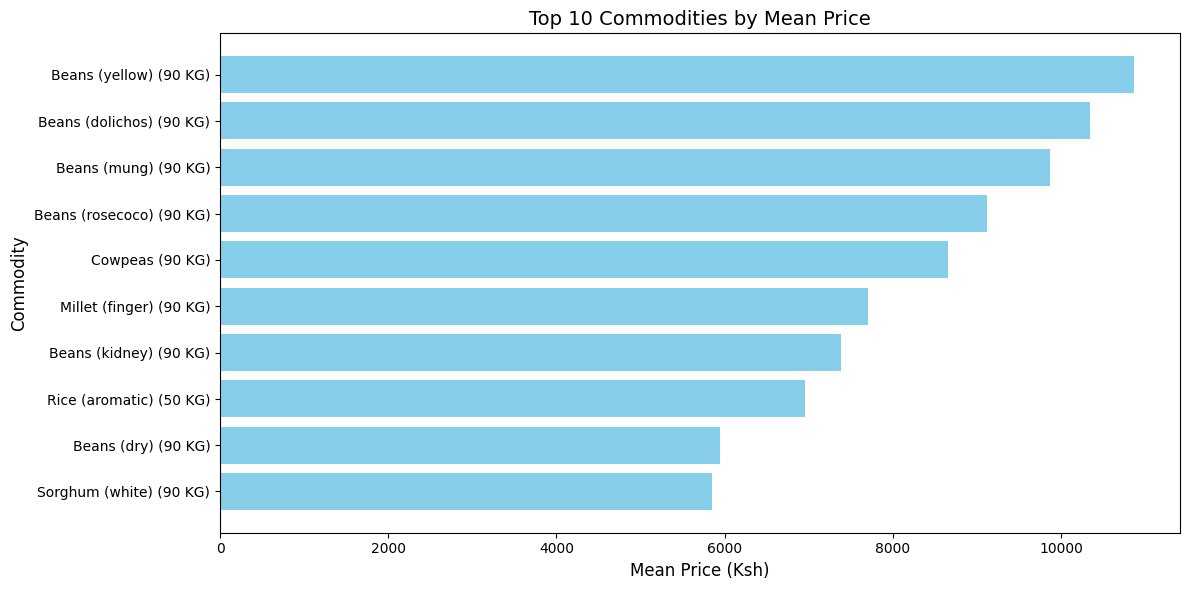

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(
    top_10['Commodity'] + " (" + top_10['Unit_Numerical'].astype(str) + " " + top_10['Unit_Values'] + ")",
    top_10['Price (Ksh)'],
    color='skyblue'
)

# Add labels and title
plt.xlabel('Mean Price (Ksh)', fontsize=12)
plt.ylabel('Commodity', fontsize=12)
plt.title('Top 10 Commodities by Mean Price', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

#### Market region With the majority share of commodities.

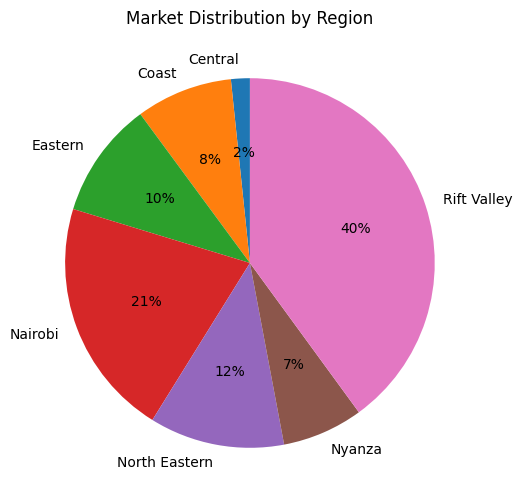

In [ ]:
# Group by 'Region' and count the number of markets
region_market_counts = df1.groupby('Region')['Market'].count().reset_index()

# Extract regions and their respective counts
regions = region_market_counts['Region']
market_counts = region_market_counts['Market']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    market_counts,
    labels=regions,
    autopct='%1.0f%%',  # Show percentages
    startangle=90,  # Start from the top
    colors=plt.cm.tab10.colors  # Use a color palette
)

# Add a title
plt.title('Market Distribution by Region')

# Display the chart
plt.show()


### Comparison of selling prices of commodities across the Years.

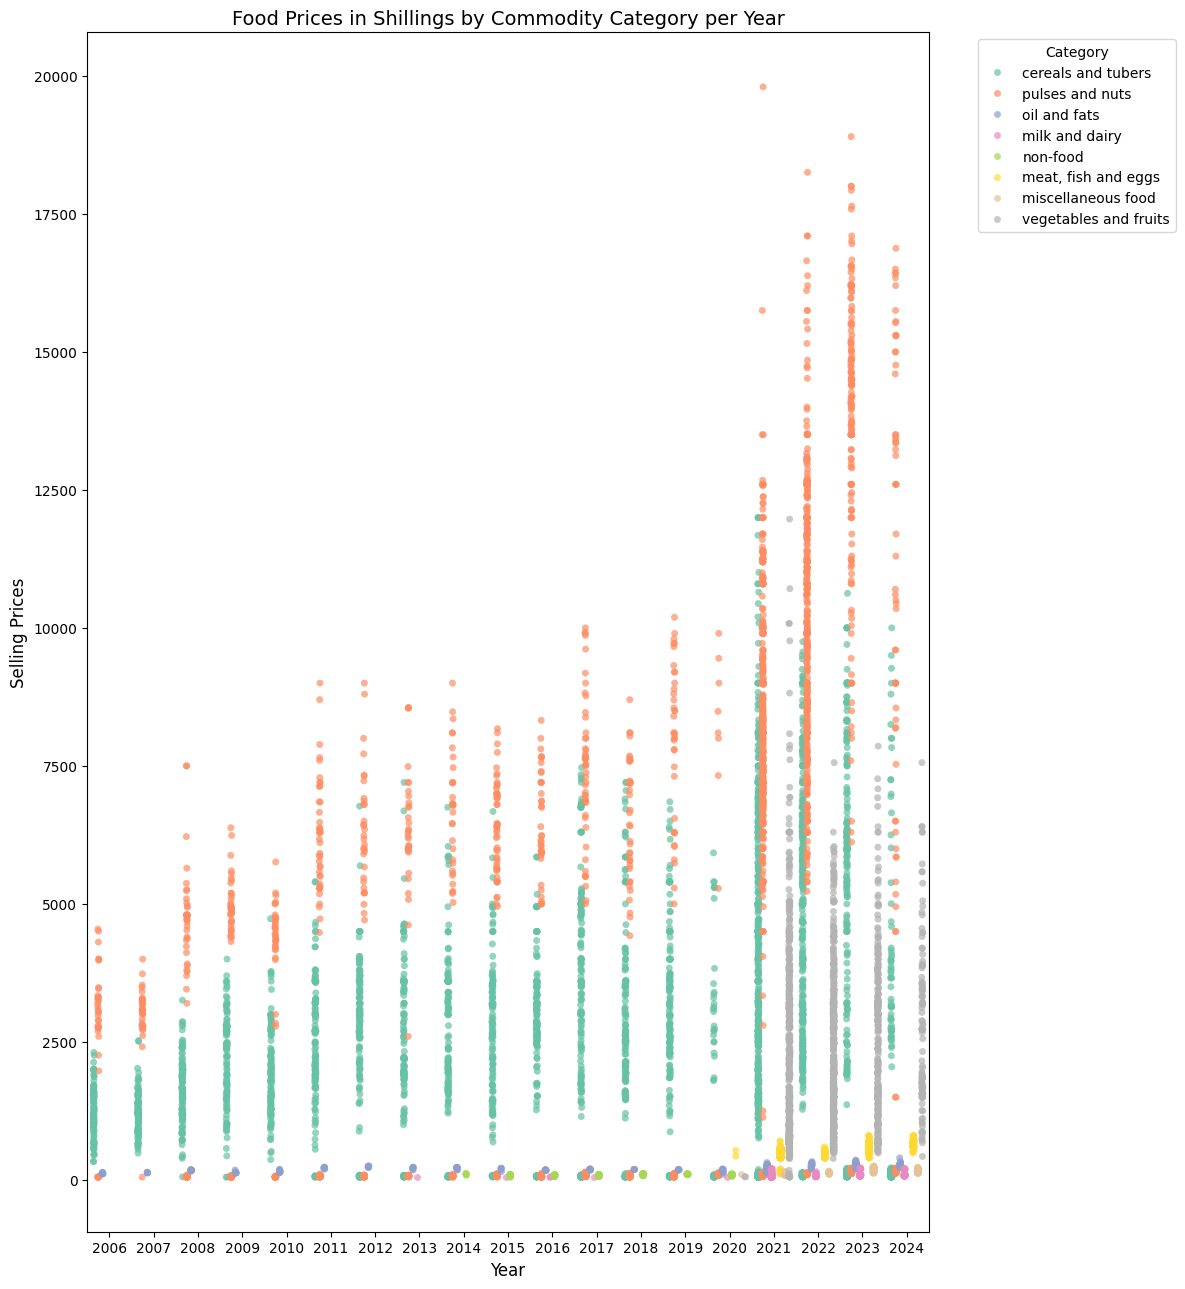

In [ ]:
# Filter out rows where the price is 0
filtered_df = df[df['Price (Ksh)'] > 50]

# Plotting the scatter plot
plt.figure(figsize=(12, 13))
sns.stripplot(
    data=filtered_df,
    x='Year',  # Use 'Year' instead of 'Month'
    y='Price (Ksh)',
    hue='Commodity Category',  # Categories for color differentiation
    jitter=True,  # Adds a small random noise for better visualization
    dodge=True,  # Separates overlapping points
    alpha=0.7,  # Transparency for better visualization
    palette='Set2'  # Use a color palette
)

# Add labels and title
plt.title('Food Prices in Shillings by Commodity Category per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Prices', fontsize=12)

# Show legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


### Modeling

check the correlation of the two series
plt the ACF

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(data, feature_col, look_back=10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[[feature_col]].values)

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i - look_back:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    if len(X) == 0 or len(y) == 0:
        return None, None, None

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def evaluate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def update_plot(selected_county, selected_market, selected_commodity, window_size=7):
    # Filter data based on selections
    filtered_data = grouped_data[
        (grouped_data['County'] == selected_county) &
        (grouped_data['Market'] == selected_market) &
        (grouped_data['Commodity'] == selected_commodity)
    ]

    if filtered_data.empty:
        print(f"No data available for the selected filters: County={selected_county}, Market={selected_market}, Commodity={selected_commodity}")
        return

    # Apply rolling average for smoothing
    filtered_data['Smoothed_Price'] = filtered_data['Price (Ksh)'].rolling(window=window_size).mean()
    filtered_data['Smoothed_Currency'] = filtered_data['Currency(USD)'].rolling(window=window_size).mean()

    # Plot the smoothed time series
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Smoothed_Price', data=filtered_data, label='Price (Ksh)', color='blue')
    sns.lineplot(x='Date', y='Smoothed_Currency', data=filtered_data, label='Currency (USD)', color='orange')

    plt.title(f"Price Trend for {selected_commodity} in {selected_market} ({selected_county})")
    plt.xlabel("Date")
    plt.ylabel("Smoothed Value")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Dynamically adjust look_back size based on available data
    look_back = min(10, len(filtered_data) - 1)
    if look_back < 2:
        print("Insufficient data for LSTM modeling.")
        return

    # Prepare data for LSTM
    X, y, scaler = preprocess_data(filtered_data, feature_col='Price (Ksh)', look_back=look_back)
    if X is None or y is None or scaler is None:
        print("Failed to preprocess data for LSTM.")
        return

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and train LSTM model
    model = create_lstm_model(input_shape=(X_train.shape[1], 1))
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Predict and inverse scale
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Evaluate the model
    rmse, mae, mape = evaluate_metrics(y_test_inv, y_pred_inv)

    # Print evaluation metrics
    print(f"Evaluation Metrics for LSTM Model:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for required columns
required_columns = ['Date', 'Region', 'County', 'Market', 'Unit_Values', 'Unit_Numerical', 'Commodity', 'Currency(USD)', 'Price (Ksh)']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

# Group data by the specified columns and calculate mean prices
grouped_data = df.groupby(['Date', 'Region', 'County', 'Market', 'Unit_Values', 'Unit_Numerical', 'Commodity']).agg({
    'Currency(USD)': 'mean',
    'Price (Ksh)': 'mean'
}).reset_index()

# Validate if grouped_data has data
if grouped_data.empty:
    raise ValueError("The grouped data is empty. Please check your dataset.")

# Create dropdowns for selecting County, Market, and Commodity
county_dropdown = widgets.Dropdown(
    options=grouped_data['County'].unique(),
    description='County:',
    disabled=False
)

market_dropdown = widgets.Dropdown(
    options=grouped_data['Market'].unique(),
    description='Market:',
    disabled=False
)

commodity_dropdown = widgets.Dropdown(
    options=grouped_data['Commodity'].unique(),
    description='Commodity:',
    disabled=False
)

# Interactive widget for updating the plot
interactive_plot = widgets.interactive(
    update_plot,
    selected_county=county_dropdown,
    selected_market=market_dropdown,
    selected_commodity=commodity_dropdown
)

# Display the widgets
display(county_dropdown, market_dropdown, commodity_dropdown, interactive_plot)


Dropdown(description='County:', options=('Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Turkana', 'Uasin Gishu', 'M…

Dropdown(description='Market:', options=('Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Lodwar', 'Eldoret town', 'M…

Dropdown(description='Commodity:', options=('Beans (dry)', 'Maize (white)', 'Potatoes (Irish)', 'Sorghum', 'Br…

interactive(children=(Dropdown(description='County:', options=('Mombasa', 'Kitui', 'Nairobi', 'Kisumu', 'Turka…

Average price for each county
Linear regression for price prediction
A graph for the top 10 commodoties trend,
Price difference between commodities in different markets(a GIS map)/table - (Gruop by top 10 Commodities- Use frequency to choose the Commodity)




In [ ]:
df["Commodity"].value_counts()

,count
Commodity,
Beans (dry),1120
Maize (white),996
Potatoes (Irish),974
Maize,928
Sorghum,848
Beans,563
Oil (vegetable),428
Tomatoes,410
Rice,369


In [ ]:
import ipywidgets as widgets
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preprocessing function to scale and prepare data
def preprocess_data(data, feature_col, look_back=10):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[[feature_col]].values)

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i - look_back:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    if len(X) == 0 or len(y) == 0:
        return None, None, None

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# ARIMA model
def create_arima_model(data):
    model = ARIMA(data, order=(5, 1, 0))  # Adjust the order as needed
    model_fit = model.fit()
    return model_fit

# Metrics evaluation function
def evaluate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Update function for plotting trends and evaluating models
def update_plot(selected_county, selected_market, selected_commodity, model_type="LSTM", window_size=7):
    # Filter data based on selections
    filtered_data = grouped_data[
        (grouped_data['County'] == selected_county) &
        (grouped_data['Market'] == selected_market) &
        (grouped_data['Commodity'] == selected_commodity)
    ]

    if filtered_data.empty:
        print(f"No data available for the selected filters: County={selected_county}, Market={selected_market}, Commodity={selected_commodity}")
        return

    # Smooth trends using rolling average
    filtered_data['Price'] = filtered_data['Price (Ksh)'].rolling(window=window_size).mean()
    filtered_data['Currency'] = filtered_data['Currency(USD)'].rolling(window=window_size).mean()

    # Drop rows with NaN values after smoothing
    filtered_data.dropna(subset=['Price', 'Currency'], inplace=True)

    # Plot trends for smoothed Price (Ksh) and Currency (USD)
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Price'], label='Price (Ksh)', color='blue')
    plt.plot(filtered_data['Date'], filtered_data['Currency'], label='Currency (USD)', color='green')
    plt.title(f'Trend for {selected_commodity} in {selected_market}, {selected_county}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Prepare data for modeling
    look_back = 10
    X, y, scaler = preprocess_data(filtered_data, feature_col='Price', look_back=look_back)
    if X is None or y is None or scaler is None:
        print("Insufficient data for modeling.")
        return

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    if len(X_train) == 0 or len(y_train) == 0:
        print("Not enough data for training after splitting.")
        return

    # Evaluate selected model
    metrics = {}
    if model_type == "LSTM":
      try:
        model = create_lstm_model(input_shape=(X_train.shape[1], 1))
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])
        y_pred = model.predict(X_test)
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        y_pred_inv = scaler.inverse_transform(y_pred)
        rmse, mae, mape = evaluate_metrics(y_test_inv, y_pred_inv)
        metrics["LSTM"] = [rmse, mae, mape]
      except Exception as e:
        print(f"Error while running the LSTM model: {e}")

    # Display evaluation metrics
    if model_type in metrics:
        print(f"Model: {model_type}")
        print(f"RMSE: {metrics[model_type][0]:.2f}")
        print(f"MAE: {metrics[model_type][1]:.2f}")
        print(f"MAPE: {metrics[model_type][2]:.2f}")
    else:
        print(f"Metrics for model {model_type} could not be calculated. Please check the data or model configuration.")
# Example dataset preprocessing
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
grouped_data = df.groupby(['Date', 'County', 'Market', 'Commodity']).agg({
    'Price (Ksh)': 'mean',
    'Currency(USD)': 'mean'
}).reset_index()

# Create dropdown widgets
county_dropdown = widgets.Dropdown(
    options=grouped_data['County'].unique(),
    description='County:',
    disabled=False
)

market_dropdown = widgets.Dropdown(
    options=grouped_data['Market'].unique(),
    description='Market:',
    disabled=False
)

commodity_dropdown = widgets.Dropdown(
    options=grouped_data['Commodity'].unique(),
    description='Commodity:',
    disabled=False
)

model_dropdown = widgets.Dropdown(
    options=["LSTM", "XGBoost", "Linear Regression"],
    description='Model:',
    disabled=False
)


# Interactive widget for updating the plot
interactive_plot = widgets.interactive(
    update_plot,
    selected_county=county_dropdown,
    selected_market=market_dropdown,
    selected_commodity=commodity_dropdown,
    model_type=model_dropdown
)

# Display widgets and interactive plot
display(county_dropdown, market_dropdown, commodity_dropdown, model_dropdown, interactive_plot)


Dropdown(description='County:', options=('Kisumu', 'Kitui', 'Mombasa', 'Nairobi', 'Turkana', 'Uasin Gishu', 'M…

Dropdown(description='Market:', options=('Kisumu', 'Kitui', 'Mombasa', 'Nairobi', 'Lodwar', 'Eldoret town', 'M…

Dropdown(description='Commodity:', options=('Beans', 'Beans (dry)', 'Maize', 'Maize (white)', 'Potatoes (Irish…

Dropdown(description='Model:', options=('LSTM', 'XGBoost', 'RandomForest', 'ARIMA'), value='LSTM')

interactive(children=(Dropdown(description='County:', options=('Kisumu', 'Kitui', 'Mombasa', 'Nairobi', 'Turka…